In [1]:
import pandas as pd
import random as rn
import numpy as np

# Визуализация
%matplotlib inline
import matplotlib.pyplot as plt

# модели
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Метрики
from sklearn.metrics import mean_squared_log_error, r2_score, root_mean_squared_log_error, mean_squared_error


In [2]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [3]:
# загрзка обучающего датасета
data_train = pd.read_csv("train.csv")

In [4]:
print(data_train.shape)

(30471, 292)


In [5]:
# отображение всех столбцов
pd.options.display.max_columns = 500

data_train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

### Выбор столбцов (признаков) для обучения

price_doc: цена продажи (это целевая переменная)

full_sq: общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения

life_sq: жилая площадь в квадратных метрах, за исключением лоджий, балконов и других нежилых помещений

floor: для квартир, этаж здания

max_floor: количество этажей в

material: материал стен

build_year: год постройки

num_room: количество жилых комнат

kitch_sq: площадь кухни

state: состояние квартиры 

product_type: покупка для частного использования или инвестиция

sub_area: название района

metro_km_walk:	Расстояние до метро

park_km:	Расстояние до парка

sadovoe_km:	Расстояние до Садового кольца

kremlin_km:	Расстояние до центра города (Кремля)

oil_chemistry_raion:	Наличие грязных производств

shopping_centers_raion:	Количество торговых центров в округе

healthcare_centers_raion:	Количество медицинских центров в округе

school_education_centers_raion:	Количество средних учебных заведений

In [6]:
# выбор столбцов текстовых
data_obj = data_train.select_dtypes('object')

In [7]:
# проверим объекты на пропуски
data_obj.info()
print('\nВсего строк: ', len(data_obj))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

In [8]:
data_train['product_type'].unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

в столбце "product_type" перечисляются типы продаж:

для инвестиций  -  Investment

для частного использования  -  OwnerOccupier

преобразуем значения:

Investment  -  1

OwnerOccupier  -  2

In [9]:
data_train['product_type'] = data_train['product_type'].replace(['Investment','OwnerOccupier'],[1,2])
data_train['product_type'].unique()

array([1, 2], dtype=int64)

In [10]:
# рассмотрим столбец sub_area, это столбец с микрорайонами
d = data_train['sub_area'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением района
d_sa['sub_area_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,sub_area,sub_area_num
0,Poselenie Sosenskoe,1
1,Nekrasovka,2
2,Poselenie Vnukovskoe,3
3,Poselenie Moskovskij,4
4,Poselenie Voskresenskoe,5


In [11]:
# добавляем столбец с числовым значением
data_train = pd.merge(data_train,d_sa,on='sub_area')

In [12]:
# рассмотрим столбец thermal_power_plant_raion, это столбец - Наличие тепловой электростанции в округе
d = data_train['thermal_power_plant_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['thermal_power_plant_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,thermal_power_plant_raion,thermal_power_plant_raion_num
0,no,1
1,yes,2


In [13]:
data_train = pd.merge(data_train,d_sa,on='thermal_power_plant_raion')

In [14]:
# рассмотрим столбец - incineration_raion	Наличие мусоросжигательных заводов
d = data_train['incineration_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['incineration_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,incineration_raion,incineration_raion_num
0,no,1
1,yes,2


In [15]:
data_train = pd.merge(data_train,d_sa,on='incineration_raion')

In [16]:
# рассмотрим столбец - oil_chemistry_raion Наличие грязных производств
d = data_train['oil_chemistry_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['oil_chemistry_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,oil_chemistry_raion,oil_chemistry_raion_num
0,no,1
1,yes,2


In [17]:
data_train = pd.merge(data_train,d_sa,on='oil_chemistry_raion')

In [18]:
# рассмотрим столбец - radiation_raion	Наличие мест захоронения радиоактивных отходов
d = data_train['radiation_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['radiation_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,radiation_raion,radiation_raion_num
0,no,1
1,yes,2


In [19]:
data_train = pd.merge(data_train,d_sa,on='radiation_raion')

In [20]:
# рассмотрим столбец - railroad_terminal_raion	Наличие железнодорожного терминала в районе
d = data_train['railroad_terminal_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['railroad_terminal_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,railroad_terminal_raion,railroad_terminal_raion_num
0,no,1
1,yes,2


In [21]:
data_train = pd.merge(data_train,d_sa,on='railroad_terminal_raion')

In [22]:
# рассмотрим столбец - big_market_raion	Наличие крупных продуктовых / оптовых рынков
d = data_train['big_market_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['big_market_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,big_market_raion,big_market_raion_num
0,no,1
1,yes,2


In [23]:
data_train = pd.merge(data_train,d_sa,on='big_market_raion')

In [24]:
# рассмотрим столбец - nuclear_reactor_raion	Наличие действующих ядерных реакторов
d = data_train['nuclear_reactor_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['nuclear_reactor_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,nuclear_reactor_raion,nuclear_reactor_raion_num
0,no,1
1,yes,2


In [25]:
data_train = pd.merge(data_train,d_sa,on='nuclear_reactor_raion')

In [26]:
# рассмотрим столбец - detention_facility_raion	Наличие центров содержания под стражей
d = data_train['detention_facility_raion'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['detention_facility_raion_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,detention_facility_raion,detention_facility_raion_num
0,no,1
1,yes,2


In [27]:
data_train = pd.merge(data_train,d_sa,on='detention_facility_raion')

In [28]:
# рассмотрим столбец - water_1line	Первая линия от реки (150 м)
d = data_train['water_1line'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['water_1line_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,water_1line,water_1line_num
0,no,1
1,yes,2


In [29]:
data_train = pd.merge(data_train,d_sa,on='water_1line')

In [30]:
# рассмотрим столбец - big_road1_1line	Первая линия от дороги (100 м для скоростных автомагистралей)
d = data_train['big_road1_1line'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['big_road1_1line_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,big_road1_1line,big_road1_1line_num
0,no,1
1,yes,2


In [31]:
data_train = pd.merge(data_train,d_sa,on='big_road1_1line')

In [32]:
# рассмотрим столбец - railroad_1line	Первая линия от железной дороги (100 м)
d = data_train['railroad_1line'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['railroad_1line_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,railroad_1line,railroad_1line_num
0,no,1
1,yes,2


In [33]:
data_train = pd.merge(data_train,d_sa,on='railroad_1line')

In [34]:
# рассмотрим столбец - ecology	Экологическая зона, в которой расположен дом
d = data_train['ecology'].value_counts()
d_sa = d.to_frame().reset_index().drop(['count'], axis=1)
# создадаим столбец с числовым представлением
d_sa['ecology_num'] = np.arange(d_sa.shape[0])+1
d_sa.head()

,ecology,ecology_num
0,poor,1
1,no data,2
2,good,3
3,excellent,4
4,satisfactory,5


In [35]:
data_train = pd.merge(data_train,d_sa,on='ecology')

In [36]:
numerical_cols = data_train.select_dtypes(include=['int64', 'float64']).columns.to_list()
print("Числовые колонки:", numerical_cols)

categorical_cols = data_train.select_dtypes(include=['object', 'category']).columns.to_list()
print("Категориальные колонки:", categorical_cols)

Числовые колонки: ['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'bui

In [37]:
np.object = object
data_train.loc[:,data_train.dtypes==np.object].columns.to_list()

['timestamp',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [38]:
# удаление текстовых столбцов, их значения в новых столбцах с числовыми значениями

data_train = data_train.drop(['timestamp',
                      'sub_area',
                      'culture_objects_top_25',
                      'thermal_power_plant_raion',
                      'incineration_raion',
                      'oil_chemistry_raion',
                      'radiation_raion',
                      'railroad_terminal_raion',
                      'big_market_raion',
                      'nuclear_reactor_raion',
                      'detention_facility_raion',
                      'water_1line',
                      'big_road1_1line',
                      'railroad_1line',
                      'ecology'], axis=1)     


In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 290 entries, id to ecology_num
dtypes: float64(119), int32(13), int64(158)
memory usage: 65.9 MB


In [39]:
np.object = object
data_train.loc[:,data_train.dtypes==np.object].columns.to_list()

[]

In [40]:
# подготовка к обучению

# загрузка правильных ответов
data_y = pd.DataFrame()
data_y['price_doc'] = data_train['price_doc']/1000
data_y.describe()

,price_doc
count,30471.000000
mean,7123.035278
std,4780.111330
min,100.000000
25%,4740.002000
50%,6274.411000
75%,8300.000000
max,111111.112000


In [54]:
# формирование тренировочных данных
data_X = data_train.drop(['price_doc'],axis=1)

In [43]:
# подсчет сколько нулевых значений в столбцах
d_nnull = data_X[data_X == 0].count()[data_X[data_X == 0].count()>0]
d_nnull = d_nnull.to_frame(name='col').reset_index().sort_values('col',ascending=True)
print('Количество столбцов с пустыми значениями: ', len(d_nnull))
print('Количество пропущенных значений в по столбцам:\n',d_nnull)

Количество столбцов с пустыми значениями:  169
Количество пропущенных значений в по столбцам:
                           index    col
36               metro_min_walk      1
34               metro_min_avto      1
37                metro_km_walk      1
44                 swim_pool_km      1
45                  ice_rink_km      1
..                          ...    ...
86   cafe_count_1000_price_high  29108
109           mosque_count_1500  29319
66    cafe_count_500_price_high  29635
89            mosque_count_1000  29887
69             mosque_count_500  30322

[169 rows x 2 columns]


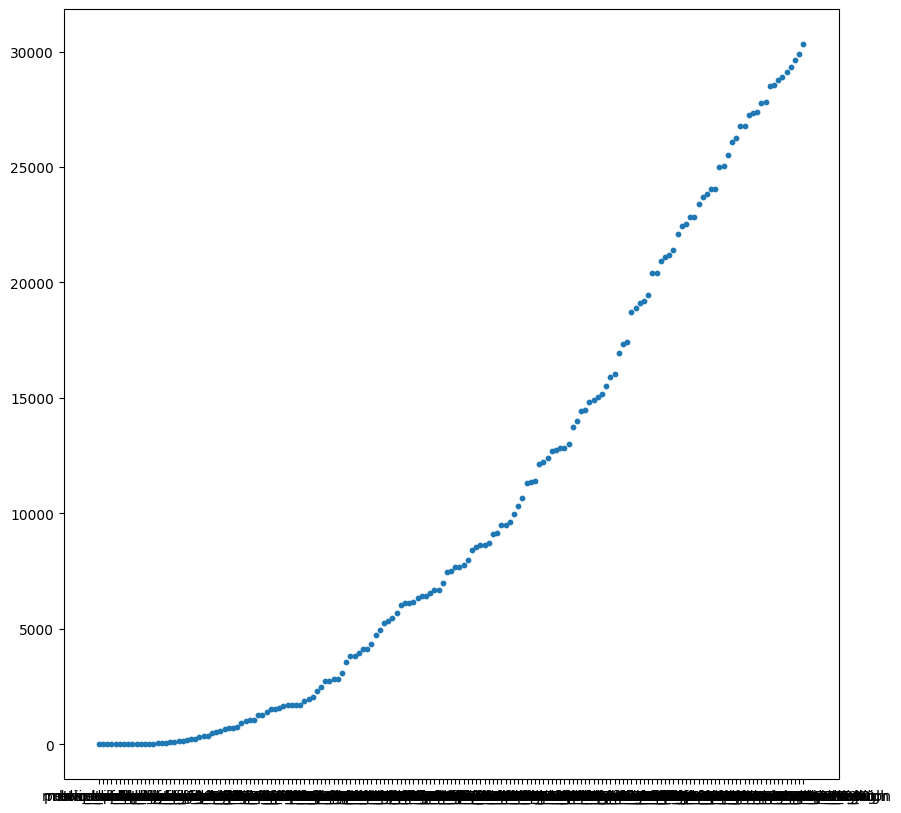

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(d_nnull['index'],d_nnull['col'],s=10)
plt.show()

In [45]:
# посмотрим какие столбцы с нулевыми значениями более 10000
d_col = d_nnull[d_nnull['col']>10000]

In [46]:
d_col

,index,col
166,leisure_count_5000,10296
126,big_church_count_2000,10657
95,office_count_1500,11304
96,office_sqm_1500,11342
88,church_count_1000,11390
...,...,...
86,cafe_count_1000_price_high,29108
109,mosque_count_1500,29319
66,cafe_count_500_price_high,29635
89,mosque_count_1000,29887


In [56]:
# удаляем столбцы с нулями больше половины строчек
for i in d_col['index']:
     data_X = data_X.drop(i,axis=1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,hospital_beds_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_brick,build_count_monolith,build_count_panel,raion_build_count_with_builddate_info,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,green_part_1000,prom_part_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_price_1000,sport_count_1000,green_part_1500,prom_part_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,church_count_1500,sport_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,church_count_2000,sport_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,big_church_count_3000,church_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,big_church_count_5000,church_count_5000,sport_count_5000,market_count_5000,sub_area_num,thermal_power_plant_raion_num,incineration_raion_num,oil_chemistry_raion_num,radiation_raion_num,railroad_terminal_raion_num,big_market_raion_num,nuclear_reactor_raion_num,detention_facility_raion_num,water_1line_num,big_road1_1line_num,railroad_1line_num,ecology_num
0,1,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,240.0,7,3,16,1,86206,40477,45729,21154,11007,10147,98

In [58]:
# подсчет сколько пропущенных значений в столбцах
d_null = data_X.isnull().sum()[data_X.isnull().sum()>0]
d_null = d_null.to_frame(name='col').reset_index().sort_values('col',ascending=True)
print('Количество столбцов с пустыми значениями: ', len(d_null))
print('Количество пропущенных значений в по столбцам:\n',d_null)

Количество столбцов с пустыми значениями:  45
Количество пропущенных значений в по столбцам:
                                     index    col
22                          metro_km_walk     25
25               ID_railroad_station_walk     25
24              railroad_station_walk_min     25
23               railroad_station_walk_km     25
21                         metro_min_walk     25
1                                   floor    167
41                         prom_part_5000    178
42            cafe_sum_5000_min_price_avg    297
43            cafe_sum_5000_max_price_avg    297
44                    cafe_avg_price_5000    297
38            cafe_sum_3000_min_price_avg    991
40                    cafe_avg_price_3000    991
39            cafe_sum_3000_max_price_avg    991
36            cafe_sum_2000_max_price_avg   1725
35            cafe_sum_2000_min_price_avg   1725
37                    cafe_avg_price_2000   1725
32            cafe_sum_1500_min_price_avg   4199
34                    ca

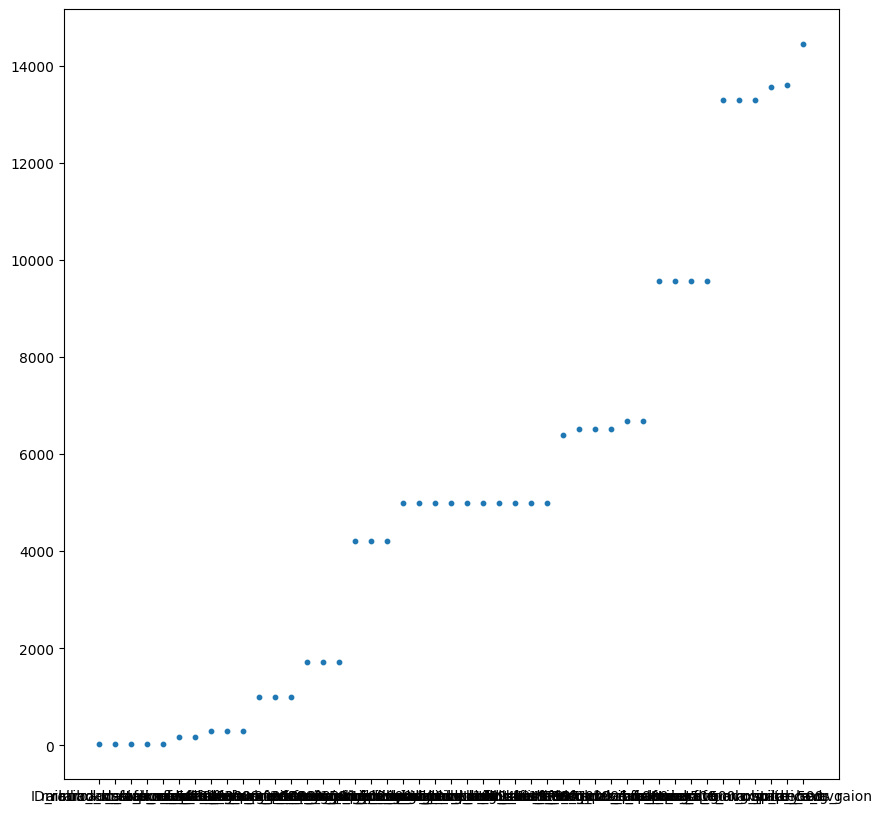

In [59]:
plt.figure(figsize=(10, 10))
plt.scatter(d_null['index'],d_null['col'],s=10)
plt.show()

In [61]:
# посмотрим какие столбцы с пустыми значениями более 10000
d_ncol = d_null[d_null['col']>10000]
d_ncol

,index,col
27,cafe_sum_500_max_price_avg,13281
26,cafe_sum_500_min_price_avg,13281
28,cafe_avg_price_500,13281
7,state,13559
4,build_year,13605
10,hospital_beds_raion,14441


In [63]:
# в столбце build_year пропущено значений почти половино, будет целесообразно удалить его для обучения
# удаляем столбцы с пустыми значениями больше 10000
for i in d_ncol['index']:
     data_X = data_X.drop(i,axis=1)

In [64]:
data_X

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_brick,build_count_monolith,build_count_panel,raion_build_count_with_builddate_info,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,green_part_1000,prom_part_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_price_1000,sport_count_1000,green_part_1500,prom_part_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,church_count_1500,sport_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,church_count_2000,sport_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,big_church_count_3000,church_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,big_church_count_5000,church_count_5000,sport_count_5000,market_count_5000,sub_area_num,thermal_power_plant_raion_num,incineration_raion_num,oil_chemistry_raion_num,radiation_raion_num,railroad_terminal_raion_num,big_market_raion_num,nuclear_reactor_raion_num,detention_facility_raion_num,water_1line_num,big_road1_1line_num,railroad_1line_num,ecology_num
0,1,43,27.0,4.0,NaN,NaN,NaN,NaN,1,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,7,3,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.0,25.

In [67]:
# смотрим в каком столбце значение в степени
data_X.describe()

,id,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_brick,build_count_monolith,build_count_panel,raion_build_count_with_builddate_info,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,green_part_1000,prom_part_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_price_1000,sport_count_1000,green_part_1500,prom_part_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,church_count_1500,sport_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,church_count_2000,sport_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,big_church_count_3000,church_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,big_church_count_5000,church_count_5000,sport_count_5000,market_count_5000,sub_area_num,thermal_power_plant_raion_num,incineration_raion_num,oil_chemistry_raion_num,radiation_raion_num,railroad_terminal_raion_num,big_market_raion_num,nuclear_reactor_raion_num,detention_facility_raion_num,water_1line_num,big_road1_1line_num,railroad_1line_num,ecology_num
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,20899.000000,20899.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,30471.0

In [66]:
data_X['area_m'] = data_X['area_m']/1000

In [70]:
# разделяем на обучающую выборку и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, shuffle=False, random_state=42)

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21329, 214), (9142, 214), (21329, 1), (9142, 1))

In [72]:
%%time

# обучаем модель с помощью дерева решений
clf = DecisionTreeRegressor(max_depth=3,min_samples_leaf=15)
clf.fit(X_train, y_train)

# получаем предсказания
predicted = clf.predict(X_test)

# выводим RMSLE
print('RMSLE: ', mean_squared_log_error(y_test,predicted, squared=False))
print('r2', r2_score(y_test, predicted))
print('MSE', mean_squared_error(y_test,predicted))

RMSLE:  0.4973875779546295
r2 0.400260519345393
MSE 12402660.898278616
CPU times: total: 625 ms
Wall time: 637 ms


c:\Users\Stas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:666: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared logarithmic error, use the function'root_mean_squared_log_error'.
  warnings.warn(
